In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from TWA_Design_Tools import TWA_Design_Toolkit
from TWA_skrf_Toolkit import TWA_skrf_Toolkit as rftoolkit
import skrf as rf

In [2]:
# Enter the physical parameters of the antenna 
num_straps = 9
f0 = 96e6
w0 = 2*np.pi*f0
clight = 3e8
Rant = 1.12 # m, hfs of d3d

# See code logbook "my antenna" section. This is for shot 147634. 
n_par = -5 
k_par = w0*n_par/clight
print(f'k_par : {k_par} 1/m')
n_phi = Rant*k_par
print(f'n_phi: {n_phi}')

# settings to create the rf toolkit object 
capz0 = 9.3506
antz0 = 30
freqs_for_fullant = np.arange(81,112, 1)#  np.array([96, 97]) # MHz
capfile = 'circ_model/S11_cap_81to111MHz.csv'
antfile = 'circ_model/fixed_bigscan_full.csv' #'circ_model/fixed_Smat_ant_96_and_97_deembed.csv'

myrfTWA = rftoolkit(num_straps=num_straps, f0=f0, k_par_max=k_par, capz0=capz0, 
                    antz0=antz0, freqs_for_fullant=freqs_for_fullant, capfile=capfile, antfile=antfile)

# add items to geometry
ar = 1.5e-2
d = 11e-2
s0 = 16e-2
wstrap = 8e-2
l = 15e-2
ts = 0.5e-2
tbox = 1e-2
h = .5e-2
t_cap_extend = 0.25e-2
wcap = wstrap + 2*t_cap_extend # 1 cm on either side
wcapbox = wcap + 2*h
tdiv = myrfTWA.geometry_dict['s_rez'] - 2*h - wcap 
dcap = ts + 2*t_cap_extend
dcapbox = dcap + 2*h
lcapbox = 10e-2
lcut = 6e-2
ldeembed = 5e-2
lfeed = 10e-2

myrfTWA.add_to_geometry('ar', ar)
myrfTWA.add_to_geometry('d', d)
myrfTWA.add_to_geometry('s0', s0)
myrfTWA.add_to_geometry('wstrap', wstrap)
myrfTWA.add_to_geometry('l', l)
myrfTWA.add_to_geometry('ts', ts)
myrfTWA.add_to_geometry('tbox', tbox)
myrfTWA.add_to_geometry('h', h)
myrfTWA.add_to_geometry('t_cap_extended', t_cap_extend)
myrfTWA.add_to_geometry('wcap', wcap)
myrfTWA.add_to_geometry('wcapbox', wcapbox)
myrfTWA.add_to_geometry('tdiv', tdiv)
myrfTWA.add_to_geometry('dcap', dcap)
myrfTWA.add_to_geometry('dcapbox', dcapbox)
myrfTWA.add_to_geometry('lcapbox', lcapbox)
myrfTWA.add_to_geometry('lcut', lcut)
myrfTWA.add_to_geometry('ldeembed', ldeembed)
myrfTWA.add_to_geometry('lfeed', lfeed)

myrfTWA.print_geometry()

k_par : -10.053096491487338 1/m
n_phi: -11.25946807046582
num_straps:     9
s_rez:          0.15625
lamda0:         3.1228381041666666
ar:             0.015
d:              0.11
s0:             0.16
wstrap:         0.08
l:              0.15
ts:             0.005
tbox:           0.01
h:              0.005
t_cap_extended: 0.0025
wcap:           0.085
wcapbox:        0.095
tdiv:           0.061249999999999985
dcap:           0.01
dcapbox:        0.02
lcapbox:        0.1
lcut:           0.06
ldeembed:       0.05
lfeed:          0.1


In [3]:
# test the cap models
capnet_test = myrfTWA.build_capnet_given_length(length=0.021,freqs=np.array([96,97]) ,filename=myrfTWA.capfile)
print(capnet_test.name)
Zcap, C = myrfTWA.print_znorm_and_capacitance(capnet_test, f=96, toprint=True)
Zcap, C = myrfTWA.print_znorm_and_capacitance(capnet_test, f=97, toprint=True)



l = 0.021
Zcap:(-0.0012613639774426047-289.5822924033037j), z0: [9.3506+0.j], Zcap/z0: [-0.0001349-30.96938083j]
C = 5.725018531974515 pF
Zcap:(-0.0012185696232601662-286.59623629126725j), z0: [9.3506+0.j], Zcap/z0: [-0.00013032-30.65003703j]
C = 5.725031948874873 pF


In [4]:
# test the antennas 

s1 = myrfTWA.get_ant_Smat_given_f(myrfTWA.antfile, f=97)
antnet_test = myrfTWA.build_antnet_chopped(freqs=np.array([96,97]), filename=myrfTWA.antfile)



In [5]:
# test full network given length
l = 0.03 
full_net_l = myrfTWA.get_fullant_given_one_length(l)
print(full_net_l.s)
myrfTWA.get_fullant_S11_S12_given_one_length(length=l, f=97)

[[[ 7.37333612e-01+0.67659949j  8.11215029e-04-0.000887j  ]
  [ 8.05916879e-04-0.00088671j  7.37541761e-01+0.6766309j ]]

 [[ 7.54010145e-01+0.65799035j  8.58605815e-04-0.00098591j]
  [ 8.53049919e-04-0.0009855j   7.54209660e-01+0.65802248j]]

 [[ 7.70240881e-01+0.63894329j  9.09985605e-04-0.00109775j]
  [ 9.04140033e-04-0.00109719j  7.70431751e-01+0.638977j  ]]

 [[ 7.86022633e-01+0.61945713j  9.65786561e-04-0.00122463j]
  [ 9.59614859e-04-0.00122392j  7.86204866e-01+0.61949332j]]

 [[ 8.01265152e-01+0.59685917j  1.02404996e-03-0.00137397j]
  [ 1.02401810e-03-0.00136589j  8.01525706e-01+0.5995687j ]]

 [[ 8.15994546e-01+0.57664468j  1.08982918e-03-0.0015391j ]
  [ 1.08991322e-03-0.00153021j  8.16390751e-01+0.57919864j]]

 [[ 8.30272161e-01+0.55598149j  1.16164172e-03-0.00172863j]
  [ 1.16176797e-03-0.00171907j  8.30796246e-01+0.55837663j]]

 [[ 8.44097898e-01+0.53485911j  1.24017045e-03-0.00194712j]
  [ 1.24048073e-03-0.00193655j  8.44738096e-01+0.53709379j]]

 [[ 8.57465046e-01+0.513

((0.9469411559156693+0.32094080376741985j),
 (0.0024025017500804422-0.006822096101518424j))

In [6]:
# now, try building the full network form a given capacitance 

C = 5.365672663526817e-12 # F
full_net_C = myrfTWA.get_fullant_given_C_via_caps(C)
print(full_net_C.s)
myrfTWA.get_fullant_S11_S12_given_C(C=C, f=96)

[[[6.94413749e-01+7.20357309e-01j 4.44447125e-04-4.31588233e-04j]
  [4.41533242e-04-4.31456202e-04j 6.94591511e-01+7.20422170e-01j]]

 [[7.10416441e-01+7.04592210e-01j 4.60031101e-04-4.66742514e-04j]
  [4.57053314e-04-4.66552196e-04j 7.10587479e-01+7.04658361e-01j]]

 [[7.26009648e-01+6.88526603e-01j 4.76398905e-04-5.04949280e-04j]
  [4.73349422e-04-5.04698753e-04j 7.26174073e-01+6.88594701e-01j]]

 [[7.41193152e-01+6.72167678e-01j 4.93602708e-04-5.46548854e-04j]
  [4.90473071e-04-5.46235670e-04j 7.41351094e-01+6.72238385e-01j]]

 [[7.56079791e-01+6.53260760e-01j 5.10913617e-04-5.94078373e-04j]
  [5.10960042e-04-5.89967467e-04j 7.56118425e-01+6.55596088e-01j]]

 [[7.70316540e-01+6.36469006e-01j 5.29840081e-04-6.43610162e-04j]
  [5.29938646e-04-6.39231272e-04j 7.70475998e-01+6.38673948e-01j]]

 [[7.84150356e-01+6.19404717e-01j 5.49776491e-04-6.97852648e-04j]
  [5.49864915e-04-6.93342956e-04j 7.84423786e-01+6.21477551e-01j]]

 [[7.97584418e-01+6.02071559e-01j 5.70787742e-04-7.57378627e-0

((0.8904828887847847+0.45416640127574365j),
 (0.000788194776836336-0.0015219755190410895j))

In [7]:
# get data from fully built comsol antenna with caps:
import csv
def get_ant_S_11_21(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            data.append(row)
    headers = data[4]
    data = data[5:]
    fmat_string  = []
    for row in data:
        fmat_string.append(row)
    fmat = np.array([[complex(num.replace('i', 'j')) for num in row] for row in fmat_string], dtype=complex)
    lcaps = fmat[:,0]
    S11_mag = np.abs(fmat[:,3])
    S21_mag = np.abs(fmat[:,4])
    return np.real(lcaps), S11_mag, S21_mag

filename2 = 'circ_model/S11_S12_96mhz_lcap_3by0_01_to_9_cm.csv'
lcaps, S11_mag_data, S21_mag_data = get_ant_S_11_21(filename2)

In [8]:
# # okay, things look like they are working!! 
# ls = np.arange(0.02, 0.096, 0.001)
# S11v, S21v, axs = myrfTWA.plot_abs_S11_S21_l_scan(ls, f=96, return_data=True)
# axs[0].plot(lcaps*100, S11_mag_data, marker='.', color='darkblue', linestyle='--', label='from pure COMSOL')
# axs[1].plot(lcaps*100, S21_mag_data, marker='.', color='darkred', linestyle='--', label='from pure COMSOL')
# axs[0].legend()
# axs[1].legend()



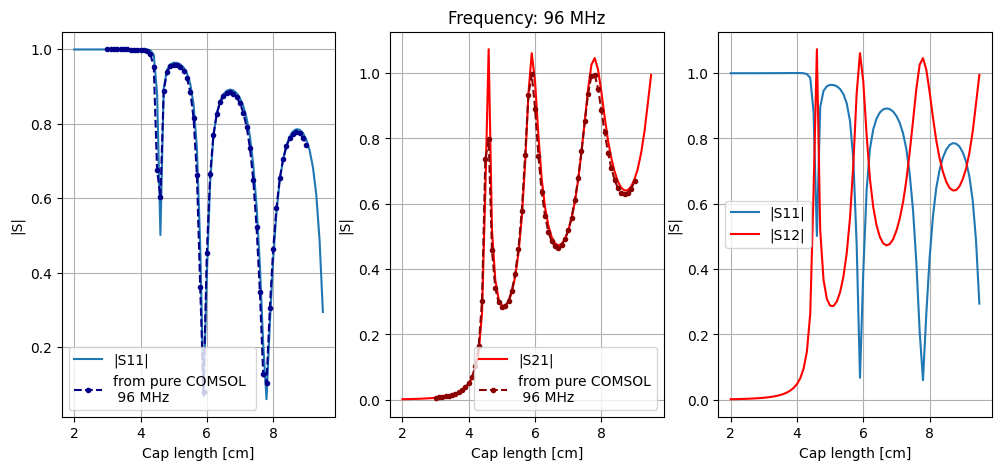

In [9]:
# okay, things look like they are working!! 
ls = np.arange(0.02, 0.096, 0.001)
S11v, S21v, axs = myrfTWA.plot_abs_S11_S21_l_scan_from_internal_datatable(ls, f=96, return_data=True)
axs[0].plot(lcaps*100, S11_mag_data, marker='.', color='darkblue', linestyle='--', label='from pure COMSOL \n 96 MHz')
axs[1].plot(lcaps*100, S21_mag_data, marker='.', color='darkred', linestyle='--', label='from pure COMSOL\n 96 MHz')
axs[0].legend()
axs[1].legend()

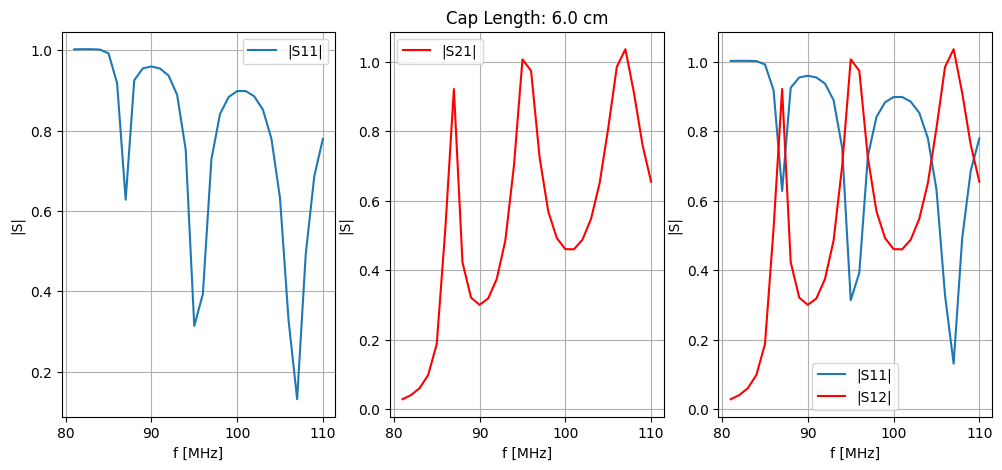

In [10]:
# now, can begin testing optimization algorithm. 
fs = np.arange(81, 111, 1)
l = 0.06
S11v, S21v, axs = myrfTWA.plot_abs_S11_S21_f_scan_from_internal_datatable(fs, l, return_data=True)


In [11]:
# now work on interpolation functions 
from scipy.interpolate import interp2d
capdata = myrfTWA.captable
round_level = 3
fs = np.real(np.unique(capdata[:,0]))
ls = np.round(np.real(np.unique(capdata[:,1])), round_level)
S11_real = np.real(capdata[:,5]).reshape(fs.shape[0], ls.shape[0]) # this is the de-embeded collumn 
S11_imag = np.imag(capdata[:,5]).reshape(fs.shape[0], ls.shape[0]) # this is the de-embeded collumn 

fsmesh, lsmesh = np.meshgrid(fs, ls, indexing='ij')
# print(fsmesh.shape, S11_imag.shape)
# i = -1
# j = -2
# print(f'f:{fsmesh[i,j]}')
# print(f'l: {lsmesh[i,j]}')
# print(f'S11: {S11_real[i,j]} + {S11_imag[i,j]}j')
S11_real_interpolator = interp2d(fsmesh, lsmesh, S11_real)
S11_imag_interpolator = interp2d(fsmesh, lsmesh, S11_imag)


C:\Users\jacob\AppData\Local\Temp\ipykernel_122964\3637424113.py:17: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  S11_real_interpolator = interp2d(fsmesh, lsmesh, S11_real)
c:\Users\jacob\anaconda3\envs\waves\Lib\site-packages\scipy\interpolate\_fitpack_impl.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=33,79 m=2356 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWa

In [12]:
myrfTWA.interpolate_cap_data(f=81, l=0.0205)

(0.9986076876315774-0.052740741009874054j)

In [13]:
from scipy.interpolate import interp1d
num_ports = 11
fs = np.arange(81,112,1)
s = myrfTWA.build_antnet_chopped_from_internal_datatable(fs, name=None).s
interp_matrix_real = []
interp_matrix_imag = []


for i in range(num_ports):
    interp_row_list_real = []
    interp_row_list_imag = []
    for j in range(num_ports):
        interp_row_list_real.append(interp1d(fs, np.real(s[:,i,j]))) # interpolate the real part 
        interp_row_list_imag.append(interp1d(fs, np.imag(s[:,i,j]))) # interpolate the imag part

    interp_matrix_real.append(interp_row_list_real)
    interp_matrix_imag.append(interp_row_list_imag)

print(len(interp_matrix_imag[10])) 

print(interp_matrix_real[10][1](83.5)) # looking good!





11
0.4673092798883052


In [14]:
# now using the new function which uses this 

freq = 83.5

Smat = myrfTWA.interpolate_sant_for_any_f(freq)

print(Smat[10, :])



[-9.57468330e-07-9.03241918e-07j  4.67309280e-01-2.87144840e-01j
  6.32536895e-08-4.12510307e-06j -4.04934459e-07-1.28073908e-05j
 -1.23840451e-06-3.81384609e-05j -6.28019476e-06-1.16708155e-04j
 -5.17673770e-05-3.82063505e-04j -4.64339243e-04-1.58912458e-03j
 -2.15337441e-03-1.13193363e-02j  5.24724654e-02-1.00870924e-01j
  7.01523949e-01+4.41790796e-01j]
